## Part 1- Data Coding and Merging

In [211]:
#Import Libraries

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# I. Data Coding and Merging



#### 1. Import the “NHL_Team.csv” Data File  Create a dataframe named **“NHL_Team”** in Jupyter Notebook by importing the `NHL_Team.csv` file.


In [212]:
#Import NHL Team Data and Display
NHL_Team=pd.read_csv("Assignment Data/Week 2/NHL_team.csv")
NHL_Team.head()

,Unnamed: 0,tid,name,tname,lname,tricode,abbr,sname
0,1,1,Toronto Maple Leafs,Maple Leafs,Toronto,TOR,TOR,Toronto
1,2,2,Montréal Canadiens,Canadiens,Montréal,MTL,MTL,Montréal
2,3,4,Winnipeg Jets,Jets,Winnipeg,WPG,WPG,Winnipeg
3,4,5,Washington Capitals,Capitals,Washington,WSH,WSH,Washington
4,5,6,Chicago Blackhawks,Blackhawks,Chicago,CHI,CHI,Chicago


##### a) Delete the following variables: `Unnamed:0`, `abbr`, `tname`,`lname`, and `sname`.


In [213]:
NHL_Team = NHL_Team.drop(["Unnamed: 0", "abbr", "tname", "lname", "sname"], axis=1)


##### b) Rename the variable `name` to `team_name`.



In [214]:
NHL_Team.rename(columns= {"name": "team_name"} , inplace= True ) 

#### 2. Import the **`NHL_competition.csv`** data file and name the dataframe as `NHL_Competition`


In [215]:
#Import NHL Competition Data and Display Head
NHL_Competition=pd.read_csv("Assignment Data/Week 2/NHL_competition.csv")
NHL_Competition.head()

,Unnamed: 0,comp_id,year,type,name,tz,start,end
0,1,1,2013,2,2013 NHL Regular Season,ET,NaN,NaN
1,2,2,2017,2,2017 NHL Regular Season,ET,NaN,NaN
2,3,2453,2013,3,2013 NHL Playoff,ET,NaN,NaN
3,4,2541,2017,3,2017 NHL Playoff,ET,NaN,NaN
4,5,2661,2012,2,2012 NHL Regular Season,ET,NaN,NaN


##### a) Delete the following variables: `Unnamed: 0`, `tz`, `start`, and `end`


In [216]:
NHL_Competition = NHL_Competition.drop(["Unnamed: 0", "tz", "start", "end"], axis=1)


##### b) Rename the variable `name` to `competition_name`.



In [217]:
NHL_Competition.rename(columns= {"name": "competition_name"} , inplace= True ) 

#### 3. Import the `NHL_game.csv` data file and name the dataframe as `NHL_Game` .


In [218]:
#Import NHL Game Data and Display Head
NHL_Game= pd.read_csv("Assignment Data/Week 2/NHL_game.csv")
NHL_Game.head()

,X,gid,comp_id,date,ascore,hscore,period,status,home_away,tid
0,1,37,2,10/7/2017,NaN,NaN,NaN,NaN,away,25
1,2,67,2,10/9/2017,NaN,NaN,NaN,NaN,away,29
2,3,154,1,10/14/2013,NaN,NaN,NaN,NaN,away,29
3,4,278,1,10/24/2013,NaN,NaN,NaN,NaN,away,53
4,5,291,1,10/25/2013,NaN,NaN,NaN,NaN,away,5


##### a) Delete the following variables: `X`,`period`, and `status`.



In [219]:
NHL_Game = NHL_Game.drop(["X", "period", "status"], axis=1)


#### 4. Merge the dataframe `NHL_Team` into the dataframe `NHL_Game` by `tid` Continue to name the merged dataframe as `NHL_Game`.



In [220]:
NHL_Game = NHL_Game.merge(NHL_Team, on='tid')



In [221]:
NHL_Game.head()

,gid,comp_id,date,ascore,hscore,home_away,tid,team_name,tricode
0,37,2,10/7/2017,NaN,NaN,away,25,Tampa Bay Lightning,TBL
1,1623,2,2/6/2018,NaN,NaN,away,25,Tampa Bay Lightning,TBL
2,2550,2541,4/23/2018,NaN,NaN,away,25,Tampa Bay Lightning,TBL
3,2649,2541,5/8/2018,NaN,NaN,away,25,Tampa Bay Lightning,TBL
4,3304,2661,3/6/2013,NaN,NaN,away,25,Tampa Bay Lightning,TBL


#### 5. Merge the dataframe `NHL_Competition` into the dataframe `NHL_Game` by `comp_id.` Continue to name the merged dataframe as `NHL_Game.`



In [222]:
NHL_Game = NHL_Game.merge(NHL_Competition, on = "comp_id") 

In [223]:
NHL_Game.head()

,gid,comp_id,date,ascore,hscore,home_away,tid,team_name,tricode,year,type,competition_name
0,37,2,10/7/2017,NaN,NaN,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season
1,1623,2,2/6/2018,NaN,NaN,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season
2,981,2,12/15/2017,4.0,1.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season
3,1607,2,2/4/2018,4.0,2.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season
4,2403,2,3/30/2018,7.0,3.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season


#### 6. In the merged `NHL_Game` dataframe, create a variable `hgd` to indicate the goal difference between home and away score **(hscore – ascore)** and delete observations **with missing value in the variable “hgd”**.



In [224]:
NHL_Game["hgd"] = NHL_Game["hscore"]  - NHL_Game["ascore"] 

#### 7. Drop all observations with missing values, if there is still any, from the `NHL_Game` dataframe.



In [225]:
NHL_Game= NHL_Game.loc[NHL_Game["hgd"].isna() == False]

In [226]:
NHL_Game.isna().any()

gid                 False
comp_id             False
date                False
ascore              False
hscore              False
home_away           False
tid                 False
team_name           False
tricode             False
year                False
type                False
competition_name    False
hgd                 False
dtype: bool

`Question 1`
What are the **number of observations** and the **number of variables** in the `NHL_Game` dataframe after performing the first **`7` steps**? 

<a id="onew"></a>


In [227]:
NHL_Game.shape

(18506, 13)

In [228]:
NHL_Game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18506 entries, 2 to 18945
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gid               18506 non-null  int64  
 1   comp_id           18506 non-null  int64  
 2   date              18506 non-null  object 
 3   ascore            18506 non-null  float64
 4   hscore            18506 non-null  float64
 5   home_away         18506 non-null  object 
 6   tid               18506 non-null  int64  
 7   team_name         18506 non-null  object 
 8   tricode           18506 non-null  object 
 9   year              18506 non-null  int64  
 10  type              18506 non-null  int64  
 11  competition_name  18506 non-null  object 
 12  hgd               18506 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 2.0+ MB


#### 8. Convert the type of the `date` variable from `object` to `datetime`.



In [229]:
NHL_Game["date"] = pd.to_datetime(NHL_Game["date"])

##### `Question 2 `What is the time range of the NHL_Game dataframe after you performed step 8?



In [230]:
print(NHL_Game.date.min() , NHL_Game.date.max()) 

2010-10-07 00:00:00 2018-06-08 00:00:00


#### 9. Sort the NHL games by `date` and show the first `15` observations.



In [231]:
NHL_Game.sort_values(by= "date").head(15)

,gid,comp_id,date,ascore,hscore,home_away,tid,team_name,tricode,year,type,competition_name,hgd
8424,5666,5662,2010-10-07,4.0,3.0,away,66,Carolina Hurricanes,CAR,2010,2,2010 NHL Regular Season,-1.0
9944,5664,5662,2010-10-07,3.0,2.0,home,8,Pittsburgh Penguins,PIT,2010,2,2010 NHL Regular Season,-1.0
9006,5664,5662,2010-10-07,3.0,2.0,away,14,Philadelphia Flyers,PHI,2010,2,2010 NHL Regular Season,-1.0
9125,5666,5662,2010-10-07,4.0,3.0,home,35,Minnesota Wild,MIN,2010,2,2010 NHL Regular Season,-1.0
8814,5662,5662,2010-10-07,2.0,3.0,home,1,Toronto Maple Leafs,TOR,2010,2,2010 NHL Regular Season,1.0
8697,5662,5662,2010-10-07,2.0,3.0,away,2,Montréal Canadiens,MTL,2010,2,2010 NHL Regular Season,1.0
9742,5672,5662,2010-10-08,3.0,2.0,away,16,San Jose Sharks,SJS,2010,2,2010 NHL Regular Season,-1.0
9546,5681,5662,2010-10-08,2.0,1.0,home,32,Ottawa Senators,OTT,2010,2,2010 NHL Regular Season,-1.0
8975,5679,5662,2010-10-08,0.0,4.0,home,18,Detroit Red Wings,DET,2010,2,2010 NHL Regular Season,4.0
10004,5668,5662,2010-10-08,3.0,4.0,away,6,Chicago Blackhawks,CHI,2010,2,2010 NHL Regular Season,1.0


#### Create two dataframes that separate the `NHL_Game` dataframe by home and away games. Name them `NHL_Home` and `NHL_Away`, respectively.


In [232]:
NHL_Home = NHL_Game.loc[NHL_Game.home_away == "home"]
NHL_Away = NHL_Game.loc[NHL_Game.home_away == "away"]



In [233]:
NHL_Home.head()


,gid,comp_id,date,ascore,hscore,home_away,tid,team_name,tricode,year,type,competition_name,hgd
41,2254,2,2018-03-20,3.0,4.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0
42,2050,2,2018-03-07,4.0,5.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0
43,844,2,2017-12-06,2.0,6.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,4.0
44,659,2,2017-11-23,2.0,3.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0
45,2147,2,2018-03-13,7.0,4.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-3.0


a) Rename variables:    
  For away games
  1. rename `ascore` to `goals_for`.
  2. rename `hscore` to `goals_against`.

 For home games
 1. rename `hscore` to `goals_for`.
 2. rename `ascore` to `goals_against`.

In [234]:
# Rename columns for home games
NHL_Home = NHL_Home.rename(columns={"hscore": "goals_for", 
                                    "ascore": "goals_against"})

# Rename columns for away games
NHL_Away = NHL_Away.rename(columns={"ascore": "goals_for", 
                                    "hscore": "goals_against"})


##### b) Create a `win` variable that equals to `1` if the team won the game; `0` if the team lost the game; and `0.5` if it was a draw. 



In [235]:
# Create 'win' variable for home games
NHL_Home['win'] = NHL_Home.apply(
    lambda row: 1 if row['goals_for'] > row['goals_against'] else 
                (0.5 if row['goals_for'] == row['goals_against'] else 0),
    axis=1
)

# Create 'win' variable for away games
NHL_Away['win'] = NHL_Away.apply(
    lambda row: 1 if row['goals_for'] > row['goals_against'] else 
                (0.5 if row['goals_for'] == row['goals_against'] else 0),
    axis=1
)


In [236]:
NHL_Home.head()

,gid,comp_id,date,goals_against,goals_for,home_away,tid,team_name,tricode,year,type,competition_name,hgd,win
41,2254,2,2018-03-20,3.0,4.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0,1.0
42,2050,2,2018-03-07,4.0,5.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0,1.0
43,844,2,2017-12-06,2.0,6.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,4.0,1.0
44,659,2,2017-11-23,2.0,3.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0,1.0
45,2147,2,2018-03-13,7.0,4.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-3.0,0.0


In [237]:
NHL_Away

,gid,comp_id,date,goals_for,goals_against,home_away,tid,team_name,tricode,year,type,competition_name,hgd,win
2,981,2,2017-12-15,4.0,1.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-3.0,1.0
3,1607,2,2018-02-04,4.0,2.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-2.0,1.0
4,2403,2,2018-03-30,7.0,3.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-4.0,1.0
5,1541,2,2018-01-31,1.0,3.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,2.0,0.0
6,1243,2,2018-01-05,1.0,2.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18919,5300,5181,2017-04-27,3.0,2.0,away,8,Pittsburgh Penguins,PIT,2016,3,2016 NHL Playoff,-1.0,1.0
18935,5242,5181,2017-04-18,2.0,3.0,away,6,Chicago Blackhawks,CHI,2016,3,2016 NHL Playoff,1.0,0.0
18936,5245,5181,2017-04-21,1.0,4.0,away,6,Chicago Blackhawks,CHI,2016,3,2016 NHL Playoff,3.0,0.0
18942,5265,5181,2017-04-16,2.0,3.0,away,11,Calgary Flames,CGY,2016,3,2016 NHL Playoff,1.0,0.0


#### 11. Append the `NHL_Home` and `NHL_Away` dataframes to be the new `NHL_Game` dataframe.



In [238]:
# Append NHL_Home and NHL_Away dataframes
NHL_Game = pd.concat([NHL_Home, NHL_Away], ignore_index=True)


In [239]:
NHL_Game

,gid,comp_id,date,goals_against,goals_for,home_away,tid,team_name,tricode,year,type,competition_name,hgd,win
0,2254,2,2018-03-20,3.0,4.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0,1.0
1,2050,2,2018-03-07,4.0,5.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0,1.0
2,844,2,2017-12-06,2.0,6.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,4.0,1.0
3,659,2,2017-11-23,2.0,3.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0,1.0
4,2147,2,2018-03-13,7.0,4.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18501,5300,5181,2017-04-27,2.0,3.0,away,8,Pittsburgh Penguins,PIT,2016,3,2016 NHL Playoff,-1.0,1.0
18502,5242,5181,2017-04-18,3.0,2.0,away,6,Chicago Blackhawks,CHI,2016,3,2016 NHL Playoff,1.0,0.0
18503,5245,5181,2017-04-21,4.0,1.0,away,6,Chicago Blackhawks,CHI,2016,3,2016 NHL Playoff,3.0,0.0
18504,5265,5181,2017-04-16,3.0,2.0,away,11,Calgary Flames,CGY,2016,3,2016 NHL Playoff,1.0,0.0


#### 12 Generate a team level dataframe that aggregates the total number of games won, the total number of `goals_for` and `goals_against` for each team in each competition (i.e. grouped by tid, competition_name and type). Name this new dataframe `NHL_Team_Stats`. Make sure to convert the indexes of the new dataframe back as  variables. 

In [240]:
NHL_Team_Stats = NHL_Game.groupby(['tid', 'competition_name', 'type']).agg(
    total_games_won=('win', 'sum'),
    total_goals_for=('goals_for', 'sum'),
    total_goals_against=('goals_against', 'sum')
).reset_index()

# Display the result
NHL_Team_Stats


,tid,competition_name,type,total_games_won,total_goals_for,total_goals_against
0,1,2010 NHL Regular Season,2,36.0,223.0,259.0
1,1,2011 NHL Regular Season,2,20.0,129.0,129.0
2,1,2012 NHL Playoff,3,3.0,18.0,22.0
3,1,2012 NHL Regular Season,2,25.0,144.0,129.0
4,1,2013 NHL Regular Season,2,38.0,231.0,250.0
...,...,...,...,...,...,...
364,66,2014 NHL Regular Season,2,30.0,191.0,228.0
365,66,2015 NHL Regular Season,2,34.0,195.0,226.0
366,66,2016 NHL Regular Season,2,35.5,219.0,243.0
367,66,2017 NHL Regular Season,2,35.5,227.0,248.0


#### 13 Create a dataframe `NHL_Game_Count` that include the total number of games played by each team in each competition (i.e. grouped by `tid`, `competition_name` and `type`). Name this new variable in the dataframe `game_count`.



In [241]:
NHL_Game_Count = (
    NHL_Game.groupby(['tid', 'competition_name', 'type' , 'team_name'])
    .size()  # Count the number of rows (games) for each group
    .reset_index(name='game_count')  # Convert the index to columns and name the new column 'game_count'
)

# Display the resulting dataframe
NHL_Game_Count


,tid,competition_name,type,team_name,game_count
0,1,2010 NHL Regular Season,2,Toronto Maple Leafs,82
1,1,2011 NHL Regular Season,2,Toronto Maple Leafs,40
2,1,2012 NHL Playoff,3,Toronto Maple Leafs,7
3,1,2012 NHL Regular Season,2,Toronto Maple Leafs,46
4,1,2013 NHL Regular Season,2,Toronto Maple Leafs,79
...,...,...,...,...,...
364,66,2014 NHL Regular Season,2,Carolina Hurricanes,82
365,66,2015 NHL Regular Season,2,Carolina Hurricanes,81
366,66,2016 NHL Regular Season,2,Carolina Hurricanes,82
367,66,2017 NHL Regular Season,2,Carolina Hurricanes,80


#### Merge dataframes.
a) Merge the `NHL_Game_Count` dataframe into the `NHL_Team_Stats` dataframe by `tid`, `competition_name`, and `type`. Continue to name the merged dataframe `NHL_Team_Stats`.


In [242]:
NHL_Team_Stats = NHL_Team_Stats.merge(NHL_Game_Count , on= ["tid","competition_name", "type"]) 
print(NHL_Team_Stats.shape)
NHL_Team_Stats.sort_values(by= "competition_name").head()

(369, 8)


,tid,competition_name,type,total_games_won,total_goals_for,total_goals_against,team_name,game_count
48,6,2010 NHL Playoff,3,3.0,22.0,16.0,Chicago Blackhawks,7
191,21,2010 NHL Playoff,3,2.0,19.0,22.0,Anaheim Ducks,6
163,19,2010 NHL Playoff,3,6.0,33.0,33.0,Nashville Predators,12
216,25,2010 NHL Playoff,3,9.0,50.0,39.0,Tampa Bay Lightning,16
149,18,2010 NHL Playoff,3,7.0,36.0,27.0,Detroit Red Wings,11


##### b) Merge the `NHL_Team` dataframe into the `NHL_Team_Stats` dataframe by `tid`. Continue to name the merged dataframe `NHL_Team_Stats`.



In [243]:
NHL_Team_Stats = NHL_Team_Stats.merge(NHL_Team , on = 'tid')
print(NHL_Team_Stats.shape)
NHL_Team_Stats.sort_values(by= "competition_name").head()

(369, 10)


,tid,competition_name,type,total_games_won,total_goals_for,total_goals_against,team_name_x,game_count,team_name_y,tricode
48,6,2010 NHL Playoff,3,3.0,22.0,16.0,Chicago Blackhawks,7,Chicago Blackhawks,CHI
191,21,2010 NHL Playoff,3,2.0,19.0,22.0,Anaheim Ducks,6,Anaheim Ducks,ANA
163,19,2010 NHL Playoff,3,6.0,33.0,33.0,Nashville Predators,12,Nashville Predators,NSH
216,25,2010 NHL Playoff,3,9.0,50.0,39.0,Tampa Bay Lightning,16,Tampa Bay Lightning,TBL
149,18,2010 NHL Playoff,3,7.0,36.0,27.0,Detroit Red Wings,11,Detroit Red Wings,DET


#### 15 Import the `pp.pk.ppgf.csv` data file and name the dataframe as `NHL_PPPK`.
#### Merge the `NHL_PPPK` dataframe into the `NHL_Team_Stats` dataframe by `tricode` and `competition_name`.



In [244]:
#Import NHL PPPK Data and Display Head
NHL_PPPK=pd.read_csv("Assignment Data/Week 2/pp.pk.ppgf.csv")
NHL_PPPK.head()

,tricode,pp,pk,ppgf,competition_name
0,ANA,35,27,9.0,2010 NHL Playoff
1,BOS,126,116,22.0,2010 NHL Playoff
2,BUF,48,46,13.0,2010 NHL Playoff
3,CHI,27,39,6.0,2010 NHL Playoff
4,DET,59,55,6.0,2010 NHL Playoff


In [245]:
NHL_Team_Stats = NHL_Team_Stats.merge(NHL_PPPK, on = ["tricode","competition_name"])
NHL_Team_Stats

,tid,competition_name,type,total_games_won,total_goals_for,total_goals_against,team_name_x,game_count,team_name_y,tricode,pp,pk,ppgf
0,1,2010 NHL Regular Season,2,36.0,223.0,259.0,Toronto Maple Leafs,82,Toronto Maple Leafs,TOR,368,426,46.0
1,1,2011 NHL Regular Season,2,20.0,129.0,129.0,Toronto Maple Leafs,40,Toronto Maple Leafs,TOR,192,182,36.0
2,1,2012 NHL Playoff,3,3.0,18.0,22.0,Toronto Maple Leafs,7,Toronto Maple Leafs,TOR,30,29,5.0
3,1,2012 NHL Regular Season,2,25.0,144.0,129.0,Toronto Maple Leafs,46,Toronto Maple Leafs,TOR,234,230,39.0
4,1,2013 NHL Regular Season,2,38.0,231.0,250.0,Toronto Maple Leafs,79,Toronto Maple Leafs,TOR,362,342,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,66,2014 NHL Regular Season,2,30.0,191.0,228.0,Carolina Hurricanes,82,Carolina Hurricanes,CAR,239,289,55.0
365,66,2015 NHL Regular Season,2,34.0,195.0,226.0,Carolina Hurricanes,81,Carolina Hurricanes,CAR,247,281,48.0
366,66,2016 NHL Regular Season,2,35.5,219.0,243.0,Carolina Hurricanes,82,Carolina Hurricanes,CAR,224,258,57.0
367,66,2017 NHL Regular Season,2,35.5,227.0,248.0,Carolina Hurricanes,80,Carolina Hurricanes,CAR,218,255,51.0


In [246]:
print(NHL_Team_Stats.tid.nunique())
print(NHL_Team_Stats.team_name_x.nunique())



33
33


In [247]:
NHL_Team_Stats.columns

Index(['tid', 'competition_name', 'type', 'total_games_won', 'total_goals_for',
       'total_goals_against', 'team_name_x', 'game_count', 'team_name_y',
       'tricode', 'pp', 'pk', 'ppgf'],
      dtype='object')

#### 16 Create new variables in the “NHL_Team_Stats” dataframe.
##### a) Winning percentage (`win_pct`)=`win`/ total number of games played
##### b) Average goals for per game (`avg_gf`)=total number of goals for / total number of games played     
##### c) Average goals against per game (`avg_ga`)=total number of goals against / total number of games played

In [248]:
NHL_Team_Stats["win_pct"] = NHL_Team_Stats["total_games_won"] / NHL_Team_Stats["game_count"]

In [249]:
NHL_Team_Stats["avg_gf"] = NHL_Team_Stats["total_goals_for"] / NHL_Team_Stats["game_count"]

In [250]:
NHL_Team_Stats["avg_ga"] = NHL_Team_Stats["total_goals_against"] / NHL_Team_Stats["game_count"]

In [251]:
NHL_Team_Stats.type.value_counts()

2    241
3    128
Name: type, dtype: int64

<a id="Q1"></a>
This is the target cell content.


In [252]:
NHL_Competition.nunique()

comp_id             16
year                 8
type                 2
competition_name    16
dtype: int64

#### In the `NHL_Competition` dataframe, the variable `type` indicates the type of competition: 
type=2 – regular season. Create a dataframe that 
contains team statistics for games only during regular seasons. Name this dataframe `NHL_Team_R_Stats`. 



In [253]:
NHL_Regular_Season = NHL_Competition[NHL_Competition['type'] == 2]

NHL_Team_R_Stats = NHL_Team_Stats.merge(
    NHL_Regular_Season[['comp_id', 'competition_name', 'type', 'year']],
    on=['competition_name','type' ])



# Display the resulting dataframe
NHL_Team_R_Stats



,tid,competition_name,type,total_games_won,total_goals_for,total_goals_against,team_name_x,game_count,team_name_y,tricode,pp,pk,ppgf,win_pct,avg_gf,avg_ga,comp_id,year
0,1,2010 NHL Regular Season,2,36.0,223.0,259.0,Toronto Maple Leafs,82,Toronto Maple Leafs,TOR,368,426,46.0,0.439024,2.719512,3.158537,5662,2010
1,2,2010 NHL Regular Season,2,43.0,213.0,203.0,Montréal Canadiens,79,Montréal Canadiens,MTL,399,363,69.0,0.544304,2.696203,2.569620,5662,2010
2,5,2010 NHL Regular Season,2,46.0,219.0,201.0,Washington Capitals,81,Washington Capitals,WSH,360,329,69.0,0.567901,2.703704,2.481481,5662,2010
3,6,2010 NHL Regular Season,2,41.5,246.0,222.0,Chicago Blackhawks,78,Chicago Blackhawks,CHI,296,310,93.0,0.532051,3.153846,2.846154,5662,2010
4,7,2010 NHL Regular Season,2,34.5,237.0,230.0,St. Louis Blues,77,St. Louis Blues,STL,387,384,39.0,0.448052,3.077922,2.987013,5662,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,51,2017 NHL Regular Season,2,34.5,261.0,293.0,New York Islanders,81,New York Islanders,NYI,273,282,62.0,0.425926,3.222222,3.617284,2,2017
237,52,2017 NHL Regular Season,2,44.0,242.0,232.0,Columbus Blue Jackets,81,Columbus Blue Jackets,CBJ,246,268,45.0,0.543210,2.987654,2.864198,2,2017
238,53,2017 NHL Regular Season,2,30.0,219.0,268.0,Vancouver Canucks,81,Vancouver Canucks,VAN,299,272,63.0,0.370370,2.703704,3.308642,2,2017
239,59,2017 NHL Regular Season,2,50.5,269.0,223.0,Vegas Golden Knights,81,Vegas Golden Knights,VGK,257,273,64.0,0.623457,3.320988,2.753086,2,2017


In [254]:
NHL_Competition.nunique()

comp_id             16
year                 8
type                 2
competition_name    16
dtype: int64

## Part 2 - Descriptive and Summary Analyses

#### 1. In the `NHL_Game` dataframe, calculate summary statistics for the  `goals_for` variable; calculate summary statistics for the `goals_against` variable based on whether it is home or away game.




`Question 1`
What are the mean and standard deviation of the total number of goals for in the `NHL_Game`dataframe?

In [255]:
print(round(NHL_Game.goals_for.mean(),3))
print(round(NHL_Game.goals_for.std(),3))


2.826
1.655



`Question 2`
- #####  What is the mean of the total number of goals against for home games? 
- ##### What is the mean of the total number of goals against for away games?



In [256]:

print(round(NHL_Home.goals_against.mean(),3))
print(round(NHL_Away.goals_against.mean(),3))



2.69
2.962



#### 2. Create a histogram of the `goals_against` variable by whether the game is home or away 
##### a) Make the color of the `histogram` green
##### b) Set the number of bins to be 20
##### c) Make sure the two sub-histograms share the same ranges for the x-axis and y-axis.

In [257]:
NHL_Game

,gid,comp_id,date,goals_against,goals_for,home_away,tid,team_name,tricode,year,type,competition_name,hgd,win
0,2254,2,2018-03-20,3.0,4.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0,1.0
1,2050,2,2018-03-07,4.0,5.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0,1.0
2,844,2,2017-12-06,2.0,6.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,4.0,1.0
3,659,2,2017-11-23,2.0,3.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0,1.0
4,2147,2,2018-03-13,7.0,4.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18501,5300,5181,2017-04-27,2.0,3.0,away,8,Pittsburgh Penguins,PIT,2016,3,2016 NHL Playoff,-1.0,1.0
18502,5242,5181,2017-04-18,3.0,2.0,away,6,Chicago Blackhawks,CHI,2016,3,2016 NHL Playoff,1.0,0.0
18503,5245,5181,2017-04-21,4.0,1.0,away,6,Chicago Blackhawks,CHI,2016,3,2016 NHL Playoff,3.0,0.0
18504,5265,5181,2017-04-16,3.0,2.0,away,11,Calgary Flames,CGY,2016,3,2016 NHL Playoff,1.0,0.0


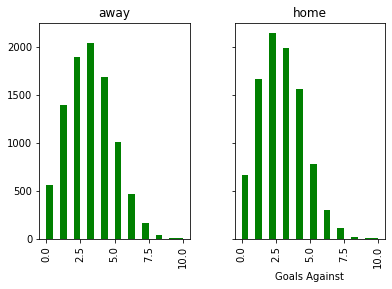

In [258]:
NHL_Game.hist(column='goals_against', bins=20, color='green',by='home_away' , sharex=True, sharey=True)
# Add titles and labels
plt.xlabel('Goals Against')
plt.ylabel('Frequency', fontsize=12)
plt.show()

## Part 3 - Correlation Analyses


1. #### In the `NHL_Team_R_Stats` dataframe, make a scatter plot to depict the relationship between the total number of goals for and the winning percentage. 


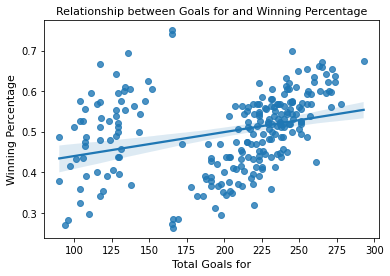

In [259]:
sns.regplot(x= "total_goals_for", y = "win_pct", 
                data =NHL_Team_R_Stats, 
                  )
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)

plt.xlabel("Total Goals for", fontsize=11)
plt.ylabel("Winning Percentage", fontsize=11)
plt.show()

2. #### In the `NHL_Team_R_Stats` dataframe, calculate the correlation coefficient between total number of goals for and winning percentage.



In [260]:
correlation = NHL_Team_R_Stats["total_goals_for"].corr(NHL_Team_R_Stats["win_pct"])
round(correlation,3)

0.316

3. #### Create a scatter plot of the total number of goals for and winning percentage similar to step 1 for regular season games. In this graph, group observations by `competition_name`.
- ##### a) Plot the total number of goals for on the x-axis and winning percentage on the y-axis.
- ##### b) Add a regression line to the scatter plot.
- ##### c) Make the title of the graph `Relationship` between Goals for and `Winning Percentage` and make the font size 11.
- ##### d) Label the x-axis Total Goals for” and label the y-axis “Winning Percentage”.


<Figure size 720x432 with 0 Axes>

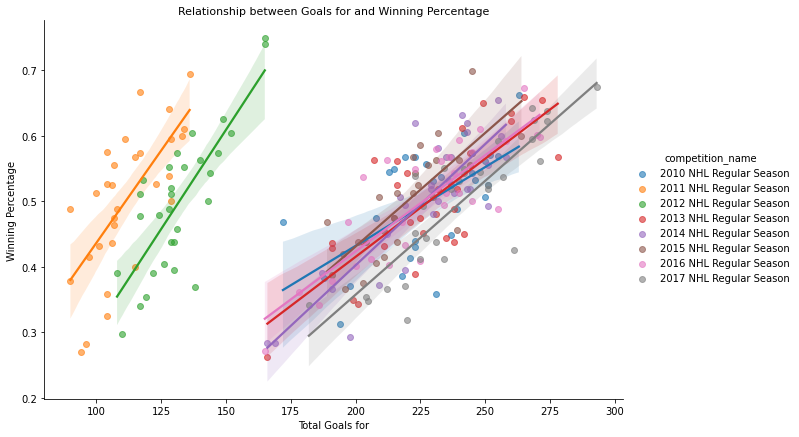

In [261]:
plt.figure(figsize=(10, 6))

plot = sns.lmplot(
    x="total_goals_for",
    y="win_pct",
    hue="competition_name",
    data=NHL_Team_R_Stats,
    aspect=1.5,
    height=6,
    scatter_kws={"alpha": 0.6},
)
plot.set_axis_labels("Total Goals for", "Winning Percentage")

# Set the title
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)

# Display the plot
plt.show()

4. #### For the `NHL_Team_R_Stats` dataframe, delete observations of 2011 and 2012 seasons. Continue to name the dataframe `NHL_Team_R_Stats`.



In [262]:
print(NHL_Team_R_Stats['year'].unique())

[2010 2011 2012 2013 2014 2015 2016 2017]


In [263]:
NHL_Team_R_Stats = NHL_Team_R_Stats[~NHL_Team_R_Stats['year'].isin([2011, 2012])]

print(NHL_Team_R_Stats['year'].unique())

[2010 2013 2014 2015 2016 2017]


5. In the new `NHL_Team_R_Stats` dataframe, create a scatter plot of total number of goals for and winning percentage.


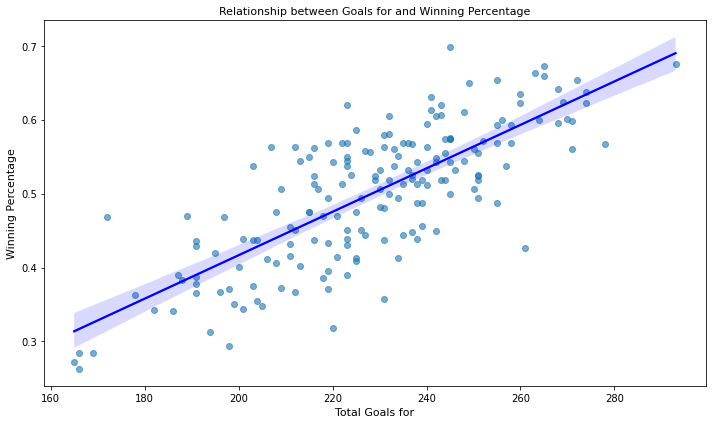

In [265]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x="total_goals_for", 
    y="win_pct", 
    data=NHL_Team_R_Stats, 
    scatter_kws={"alpha": 0.6},  # Adjust transparency of points
    line_kws={"color": "blue"}  # Customize regression line color
)

plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)
plt.xlabel("Total Goals for", fontsize=11)
plt.ylabel("Winning Percentage", fontsize=11)

plt.tight_layout()
plt.show()

6. #### Calculate the correlation coefficient between total number of goals for and winning percentage in the updated `NHL_Team_R_Stats` dataframe.



In [267]:
correlation = NHL_Team_R_Stats['total_goals_for'].corr(NHL_Team_R_Stats['win_pct'])
print(f"The correlation coefficient is: {correlation:.3f}")


The correlation coefficient is: 0.771


## Uncomment this Section once your assignment is complete

In [268]:
#Save Dataframes as .csv files
NHL_Game.to_csv("NHL_Game2.csv", index=False)
NHL_Team_Stats.to_csv("NHL_Team_Stats.csv", index=False)
NHL_Team_R_Stats.to_csv("NHL_Team_R_Stats.csv", index=False)